In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [17]:
img_rows, img_cols = x_train[0].shape[0],x_train[0].shape[1]
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

n_classes = 10
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)

In [19]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
# hyperparameters
batch_size = 128
n_epoch = 20

In [22]:
model.fit(x_train,y_train, batch_size=batch_size,epochs=n_epoch)

Epoch 1/20
60000/60000 [==============================] - 325s 5ms/step - loss: 0.1861 - acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0708 - acc: 0.9789
Epoch 3/20
60000/60000 [==============================] - 324s 5ms/step - loss: 0.0507 - acc: 0.9847
Epoch 4/20
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0401 - acc: 0.9878
Epoch 5/20
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0331 - acc: 0.9897
Epoch 6/20
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0281 - acc: 0.9911
Epoch 7/20
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0243 - acc: 0.9918
Epoch 8/20
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0221 - acc: 0.9930
Epoch 9/20
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0199 - acc: 0.9935
Epoch 10/20
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0163 - a

In [23]:
# testing the accuracy score
score = model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 16s 2ms/step


In [24]:
score

[0.03360080487360265, 0.9923]

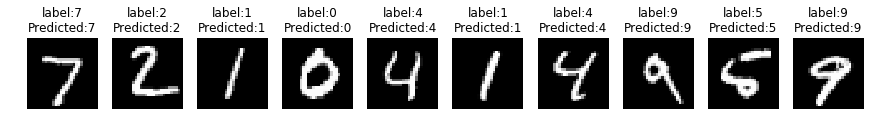

In [26]:
preds = model.predict(x_test)
n = 10
plt.figure(figsize=(15,15))

for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[i,:,:,0], cmap='gray')
    plt.title('label:{}\nPredicted:{}'.format(np.argmax(y_test[i]),np.argmax(preds[i])))
    plt.axis('off')

plt.show()